## Exercise3

In class, we discussed two different strategies for computing the Fibonacci sequence: directly with the recursive strategy, and recursive but modified using lru_cache. Implement both (yes, I know, I gave you implementations on the slides, but try to do this exercise from scratch as much as possible) (5 points), time them as functions of n (5 points), and display this in the way you think is best (5 points). Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).

## Response 

In [1]:
from functools import lru_cache
import time 
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Computing Fibonacci Sequence through Recursive Strategy

In [2]:
def fibo(n):
    if(n==1 or n== 2):
        return(1)
    return fibo(n-1) + fibo(n-2)

#### Computing Fibonacci Sequence using lru_cache and recursive strategy

In [3]:
@lru_cache
def fibo_lru(n):
    if(n==1 or n== 2):
        return 1
    return fibo_lru(n-1) + fibo_lru(n-2)

In [4]:
def timing_perf_counter(f, val_max):
    times = {}
    for i in range(1, val_max):
        start = time.perf_counter()
        val = f(i)
        stop = time.perf_counter()
        times[i]= stop - start
    return times

In [7]:
fibo_time = timing_perf_counter(fibo, 40)

In [8]:
fibo_vals  = sorted(fibo_time.items())
x,y = zip(*fibo_vals)

In [15]:
fibo_lru_time = timing_perf_counter(fibo_lru,10000)

In [16]:
fibo_lru_vals = sorted(fibo_lru_time.items())
z,c = zip(*fibo_lru_vals)

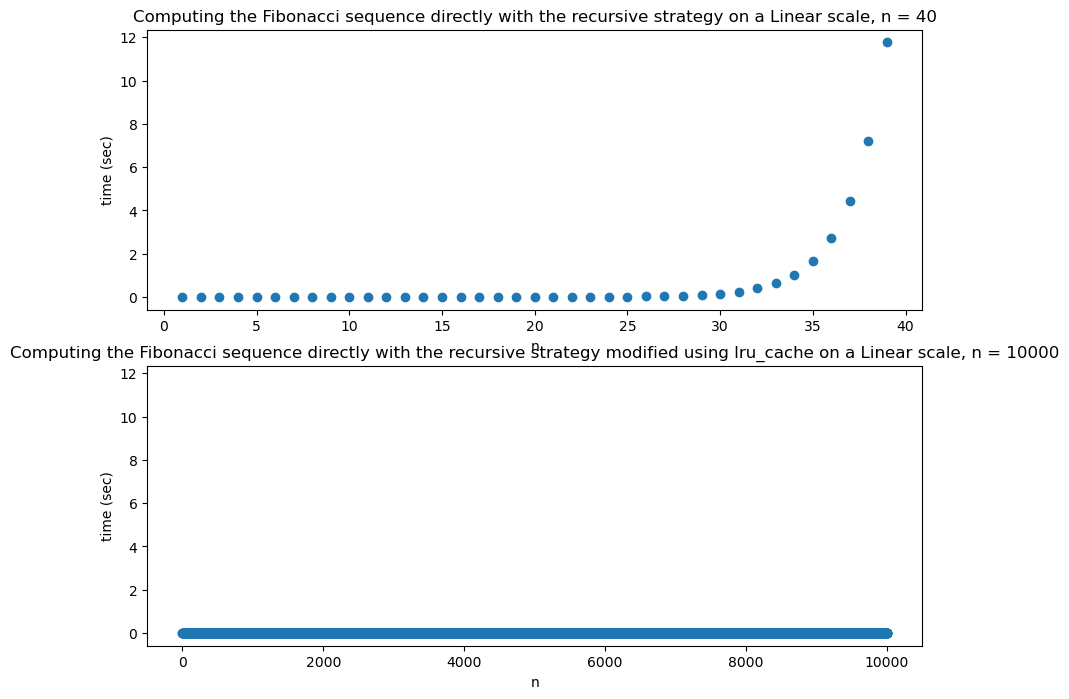

In [25]:
fig,axs = plt.subplots(2,1, figsize = (10,8), sharey = True)

plt.subplot(2,1,1)
plt.scatter(x, y)
plt.yscale('linear')
plt.xscale('linear') 
plt.title('Computing the Fibonacci sequence directly with the recursive strategy on a Linear scale, n = 40')
plt.ylabel('time (sec)')
plt.xlabel("n")
                       
plt.subplot(2,1,2)
plt.scatter(z, c)
plt.yscale('linear')
plt.xscale('linear')
plt.title('Computing the Fibonacci sequence directly with the recursive strategy modified using lru_cache on a Linear scale, n = 10000')
plt.ylabel('time (sec)')
plt.xlabel("n")
                       
plt.show()

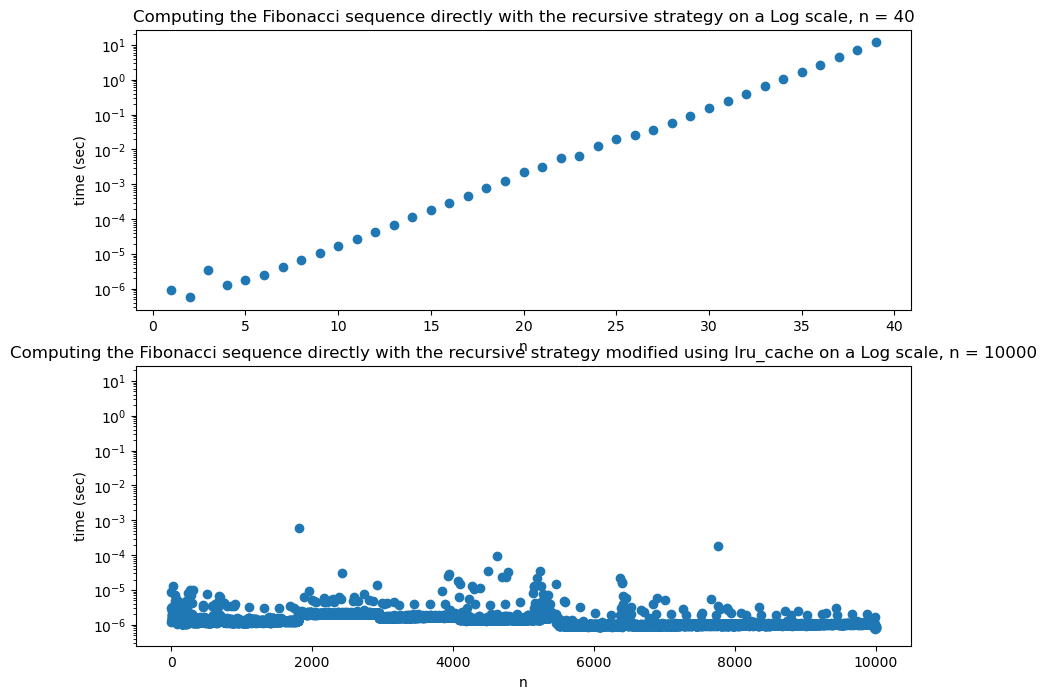

In [29]:
fig,axs = plt.subplots(2,1, figsize = (10,8), sharey = True)

plt.subplot(2,1,1)
plt.scatter(x, y)
plt.yscale('log')  
plt.title('Computing the Fibonacci sequence directly with the recursive strategy on a Log scale, n = 40')
plt.ylabel('time (sec)')
plt.xlabel("n")
                       
plt.subplot(2,1,2)
plt.scatter(z, c)
plt.yscale('log')
plt.xscale('linear')
plt.title('Computing the Fibonacci sequence directly with the recursive strategy modified using lru_cache on a Log scale, n = 10000')
plt.ylabel('time (sec)')
plt.xlabel("n")
                       
plt.show()

#### The time complexity for a a recursive fibonacci sequence is in order of 1.6^n (as in the class slides). In the recursive finonacci sequence we calculate the same thing repeatedly and we may express time taken at N as T(n) = T(n-1) + T(n-2) + O(1). Using lru_cache we can cache values and then we calculate them once after which point the method looks up the value in the stored cache. It is type of memoization technique. Memoization involves caching the outcomes of a method call so that the subsequent calls with identical inputs don’t require recalculating the results from scratch.This results in almost negilgible time for even very large values of n (in case of 10000). In comparison the regular fibonacci function takes a lot longer to calculate for n = 50 than it does for n = 40. It took a long time to get the runtime for n > 40 through the Fibonacci naive implementation.  I plotted a linear scale scatter plot and a log-log scatter plot.The regular method quickly starts to grow i.e takes more time beyond 40. Even on a log-log graph the time complexity for lru_cache looks exponential on a log-log graph which validates the time complexity of 1.6^n. we can see from the graph that the time it takes is close to 0. As a result, we can conclude that lru_cache()  is more effiecient for large numbers.